In [39]:
import seaborn as sea
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

from pandas.api.types import is_numeric_dtype
from sklearn.cluster import KMeans

In [40]:
fifa_20_players = pd.read_csv("players_20.csv")
fifa_20_players = fifa_20_players.drop(columns=['player_url', 'dob','body_type','nation_position','nation_jersey_number'])
fifa_20_players['gk_diving'] = fifa_20_players['gk_diving'].replace(np.nan, 0.0)
fifa_20_players['gk_handling'] = fifa_20_players['gk_handling'].replace(np.nan, 0.0)
fifa_20_players['gk_kicking'] = fifa_20_players['gk_kicking'].replace(np.nan, 0.0)
fifa_20_players['gk_reflexes'] = fifa_20_players['gk_reflexes'].replace(np.nan, 0.0)
fifa_20_players['gk_speed'] = fifa_20_players['gk_speed'].replace(np.nan, 0.0)
fifa_20_players['gk_positioning'] = fifa_20_players['gk_positioning'].replace(np.nan, 0.0)
fifa_20_players['release_clause_eur'] = fifa_20_players['release_clause_eur'].replace(np.nan, 0.0)
fifa_20_players['player_tags'] = fifa_20_players['player_tags'].replace(np.nan, "#None")
fifa_20_players['player_traits'] = fifa_20_players['player_traits'].replace(np.nan, 'None')
fifa_20_players['loaned_from'] = fifa_20_players['loaned_from'].replace(np.nan, 'None')
fifa_20_players['joined'] = fifa_20_players['joined'].replace(np.nan, '2019-08-31')

# Clustering (K-means)

In this hypothesis, we specifically looked at the prediction of player categories such as goalkeeper, defender, midfielder, and attacker based on attributes attacking_finishing and defending_marking.

Text(0.5, 0, 'Defending Marking')

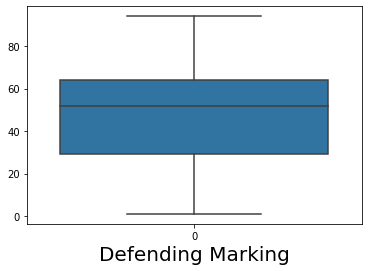

In [41]:
sea.boxplot(data=fifa_20_players.defending_marking).set_xlabel('Defending Marking',fontsize=20)

Text(0.5, 0, 'Defending Marking')

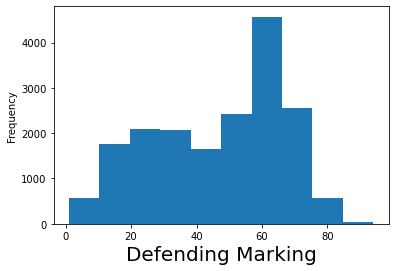

In [42]:
fifa_20_players.defending_marking.plot.hist(bins=10).set_xlabel('Defending Marking',fontsize=20)

Text(0.5, 0, 'Overall')

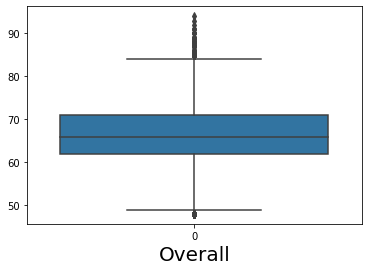

In [43]:
sea.boxplot(data=fifa_20_players.overall).set_xlabel('Overall',fontsize=20)

Text(0.5, 0, 'Overall')

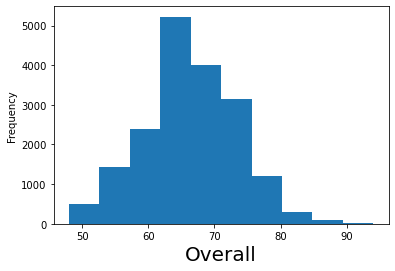

In [44]:
fifa_20_players.overall.plot.hist(bins=10).set_xlabel('Overall',fontsize=20)

Text(0.5, 0, 'Attacking Finishing')

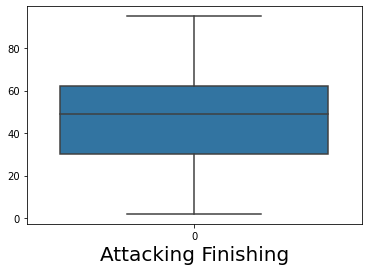

In [45]:
sea.boxplot(data=fifa_20_players.attacking_finishing).set_xlabel('Attacking Finishing',fontsize=20)

Text(0.5, 0, 'Attacking Finishing')

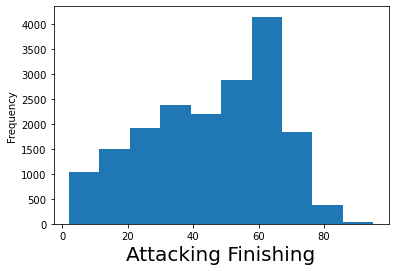

In [46]:
fifa_20_players.attacking_finishing.plot.hist(bins=10).set_xlabel('Attacking Finishing',fontsize=20)

We made a new dataframe with the attributes we need and we narrowed down the list of players based on attribute overall. Players with the value greater than or equal to 80 were chosen because the differences between players should be more radical.  

In [47]:
df = fifa_20_players[['overall','attacking_finishing','defending_marking','player_positions','nationality']]
df = df[df.overall >= 80]
df.nationality.unique()

array(['Argentina', 'Portugal', 'Brazil', 'Slovenia', 'Belgium',
       'Germany', 'Netherlands', 'Croatia', 'Egypt', 'France', 'Senegal',
       'England', 'Spain', 'Italy', 'Uruguay', 'Poland', 'Denmark',
       'Gabon', 'Korea Republic', 'Costa Rica', 'Slovakia',
       'Bosnia Herzegovina', 'Serbia', 'Scotland', 'Hungary',
       'Switzerland', 'Greece', 'Austria', 'Morocco', 'Sweden', 'Wales',
       'Colombia', 'Czech Republic', 'Chile', 'Algeria', 'Ivory Coast',
       'Togo', 'Norway', 'Mexico', 'Iceland', 'Finland', 'Jamaica',
       'Albania', 'Guinea', 'Cameroon', 'Ghana', 'Montenegro', 'Ukraine',
       'Russia', 'DR Congo', 'Central African Rep.', 'Venezuela',
       'Nigeria', 'Armenia', 'Israel', 'Ecuador', 'Paraguay', 'Australia',
       'Turkey', 'Romania', 'Japan', 'Mali'], dtype=object)

In [48]:
len(df.index)

568

As we can see, the new dataframe contains only 568 records.

In [49]:
selected_columns = ['attacking_finishing','defending_marking']
cluster_players = df.loc[:, selected_columns]
cluster_players.head(8)

,attacking_finishing,defending_marking
0,95,33
1,94,28
2,87,27
3,11,27
4,84,34
5,82,68
6,14,25
7,52,91


In order to begin clustering, we only selected 2 attributes, mentioned above.

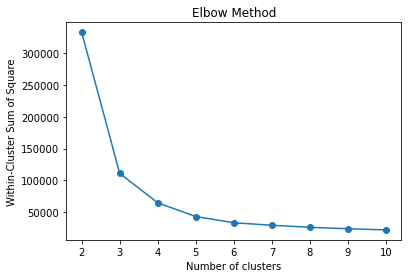

In [50]:
wcss = [] 

for number_of_clusters in range(2,11):
    kmeans = KMeans(n_clusters=number_of_clusters, init='k-means++', random_state=0)
    kmeans.fit(cluster_players)
    wcss.append(kmeans.inertia_)

plt.plot(range(2,11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-Cluster Sum of Square')
plt.show()

We chose the elbow method to determine the ideal number of clusters. As we can see on the graph above, there is still a significant bend between 3 and 4. So, we decided to work with 4 clusters.

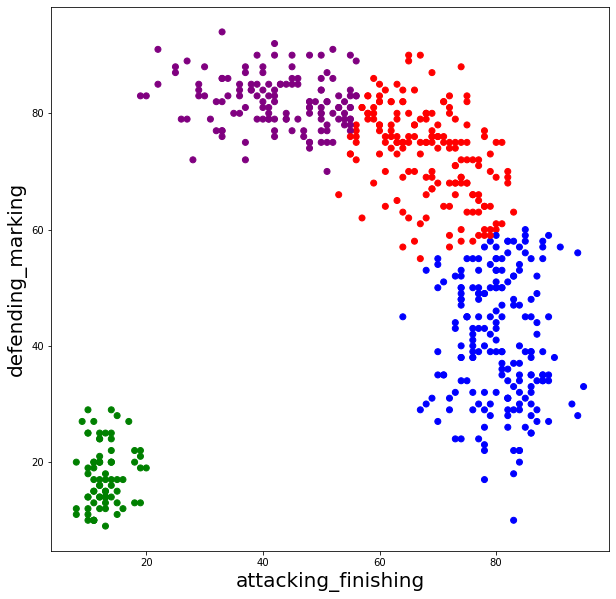

In [51]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0)
kmeans.fit(cluster_players)
y_pred = kmeans.predict(cluster_players)
color_list=[]
for number in y_pred:
    if number == 0:
        color_list.append('green')
    elif number == 1:
        color_list.append('red')
    elif number == 2:
        color_list.append('blue')
    else:
        color_list.append('purple')
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
plt.scatter(cluster_players['attacking_finishing'],cluster_players['defending_marking'],c=color_list)
plt.xlabel("attacking_finishing", fontsize=20)
plt.ylabel("defending_marking", fontsize=20)
plt.show()

The K-means method with 4 clusters produced this result. We can see 4 groups, 1 isolated, and the other 3 closer together. All four clusters are displayed in different colors. The most isolated cluster most likely represents goalkeepers, attackers should have high attacking finishing values and defenders are completely opposite to attackers. The last cluster should be in between attackers and defenders, and we call it midfielders.

In [52]:
df['player_positions'].unique()

array(['RW, CF, ST', 'ST, LW', 'LW, CAM', 'GK', 'LW, CF', 'CAM, CM', 'CB',
       'CM', 'RW, ST', 'ST, RW', 'ST', 'CDM, CM', 'CF, ST, LW', 'CAM, RW',
       'CM, CDM', 'RW, LW', 'CAM, LM, ST', 'ST, LM', 'LW, LM', 'CB, LB',
       'RW, CAM, CM', 'CDM', 'CF, LM', 'CF, ST', 'LB', 'CM, CAM, CDM',
       'CF, LW, ST', 'LW', 'CB, CDM', 'RB, CM, CDM', 'CAM, CM, LW',
       'CF, ST, CAM', 'LW, CM', 'CAM, RM, RW', 'CM, CAM', 'CM, LM, RM',
       'LB, CB', 'RB', 'CAM, CF, ST', 'RW, LW, ST', 'LB, LM',
       'RM, LM, CM', 'CAM, CM, RM', 'RM, LM', 'CAM, RM', 'CF, LW, CAM',
       'CAM, LM, RM', 'LM, RM, LW', 'RM, LM, LW', 'CAM', 'CAM, CM, CF',
       'LM', 'CDM, CB', 'RB, CB', 'RM, RW', 'LM, RW, LW', 'RM, CM',
       'CAM, LW, ST', 'RW, RM', 'CM, CDM, CAM', 'CM, CAM, CF',
       'LW, ST, LM', 'LM, ST', 'RM, RW, ST', 'LM, CAM, RM', 'LW, RW',
       'CF, LM, LW', 'RM, CAM', 'CF, RM, LM', 'RW, LW, CAM',
       'CDM, CM, CAM', 'CDM, CB, LB', 'ST, CAM, LW', 'ST, CF', 'RW, CAM',
       'LW, LM, RW', 'RW

As we are trying to predict player's position, we need to know all different positions possible. From the array above we have concluded that there 15 different specific positions. They are: GK, CB, LB, RB, LWB, RWB, CDM, CM, RM, LM, CAM, RW, LW, ST, CF.

In [53]:
df.insert(1,"cluster",y_pred)
df

,overall,cluster,attacking_finishing,defending_marking,player_positions,nationality
0,94,2,95,33,"RW, CF, ST",Argentina
1,93,2,94,28,"ST, LW",Portugal
2,92,2,87,27,"LW, CAM",Brazil
3,91,0,11,27,GK,Slovenia
4,91,2,84,34,"LW, CF",Belgium
...,...,...,...,...,...,...
563,80,1,58,80,"CDM, CM",Brazil
564,80,3,51,70,"LB, LM",Brazil
565,80,0,8,12,GK,Uruguay
566,80,1,58,80,"CDM, CM",Uruguay


In [54]:
cluster0 = -1
cluster1 = -1
cluster2 = -1
cluster3 = -1
for index, row in df.iterrows():
    if row['attacking_finishing'] > 90:
        cluster3 = row['cluster']
    elif row['attacking_finishing'] > 30 and row['attacking_finishing'] < 45:
        cluster1 = row['cluster']
    elif row['defending_marking'] < 30 and row['attacking_finishing'] < 30:
        cluster0 = row['cluster']
    elif row['defending_marking'] >= 63 and row['defending_marking'] <= 66:
        cluster2 = row['cluster']
    if cluster0 != -1 and cluster1 != -1 and cluster3 != -1 and cluster2 != -1:
        break

By adding a new column, meaning cluster, returned from K-means method, we need to know which cluster is which.

In [55]:
predicted_pos = []


for index, row in df.iterrows():
    if row['cluster'] == 0: 
        if cluster0 == 0:
            predicted_pos.append('GK')   
        elif cluster1 == 0:
            predicted_pos.append('DEF')
        elif cluster2 == 0:
            predicted_pos.append('MID')
        elif cluster3 == 0:
            predicted_pos.append('ATT')   
    elif row['cluster'] == 1:
        if cluster0 == 1:
            predicted_pos.append('GK')   
        elif cluster1 == 1:
            predicted_pos.append('DEF')
        elif cluster2 == 1:
            predicted_pos.append('MID')
        elif cluster3 == 1:
            predicted_pos.append('ATT')     
    elif row['cluster'] == 2:
        if cluster0 == 2:
            predicted_pos.append('GK')   
        elif cluster1 == 2:
            predicted_pos.append('DEF')
        elif cluster2 == 2:
            predicted_pos.append('MID')
        elif cluster3 == 2:
            predicted_pos.append('ATT')   
    else:
        if cluster0 == 3:
            predicted_pos.append('GK')   
        elif cluster1 == 3:
            predicted_pos.append('DEF')
        elif cluster2 == 3:
            predicted_pos.append('MID')
        elif cluster3 == 3:
            predicted_pos.append('ATT')   

df.insert(2,'predicted_pos',predicted_pos)
df

,overall,cluster,predicted_pos,attacking_finishing,defending_marking,player_positions,nationality
0,94,2,ATT,95,33,"RW, CF, ST",Argentina
1,93,2,ATT,94,28,"ST, LW",Portugal
2,92,2,ATT,87,27,"LW, CAM",Brazil
3,91,0,GK,11,27,GK,Slovenia
4,91,2,ATT,84,34,"LW, CF",Belgium
...,...,...,...,...,...,...,...
563,80,1,MID,58,80,"CDM, CM",Brazil
564,80,3,DEF,51,70,"LB, LM",Brazil
565,80,0,GK,8,12,GK,Uruguay
566,80,1,MID,58,80,"CDM, CM",Uruguay


Based on the number and different values in both attributes we can determine the predicted position.

In [56]:
results = pd.DataFrame(columns=['predicted_pos', 'ATT', 'MID','DEF','GK'])
row1 = {'predicted_pos': 'pred_ATT', 'ATT': 0, 'MID': 0, 'DEF' : 0, 'GK' : 0}
row2 = {'predicted_pos': 'pred_MID', 'ATT': 0, 'MID': 0, 'DEF' : 0, 'GK' : 0}
row3 = {'predicted_pos': 'pred_DEF', 'ATT': 0, 'MID': 0, 'DEF' : 0, 'GK' : 0}
row4 = {'predicted_pos': 'pred_GK', 'ATT': 0, 'MID': 0, 'DEF' : 0, 'GK' : 0}
results = results.append(row1, ignore_index = True).append(row2, ignore_index = True).append(row3, ignore_index = True).append(row4, ignore_index = True)
results

,predicted_pos,ATT,MID,DEF,GK
0,pred_ATT,0,0,0,0
1,pred_MID,0,0,0,0
2,pred_DEF,0,0,0,0
3,pred_GK,0,0,0,0


We created a new dataframe where we will be comparing our predicted results to the real ones.

In [57]:
goalkeepers = ['GK']
defenders = ['CB','LB','RB','LWB','RWB']
midfielders = ['CDM','CM','RM','LM','CAM']
attackers = ['RW','LW','CF','ST']

for index,row in df.iterrows():
    pos = row['player_positions']
    pos = pos.partition(',')
    if row['predicted_pos'] == 'GK':
        if str(pos[0]) in goalkeepers:
            results.at[3,'GK'] += 1
        elif str(pos[0]) in defenders:
            results.at[3,'DEF'] += 1
        elif str(pos[0]) in midfielders:
            results.at[3,'MID'] += 1
        elif str(pos[0]) in attackers:
            results.at[3,'ATT'] += 1
    elif row['predicted_pos'] == 'DEF':
        if pos[0] in goalkeepers:
            results.at[2,'GK'] += 1
        elif str(pos[0]) in defenders:
            results.at[2,'DEF'] += 1
        elif str(pos[0]) in midfielders:
            results.at[2,'MID'] += 1
        elif str(pos[0]) in attackers:
            results.at[2,'ATT'] += 1
    elif row['predicted_pos'] == 'MID':
        if pos[0] in goalkeepers:
            results.at[1,'GK'] += 1
        elif str(pos[0]) in defenders:
            results.at[1,'DEF'] += 1
        elif str(pos[0]) in midfielders:
            results.at[1,'MID'] += 1
        elif str(pos[0]) in attackers:
            results.at[1,'ATT'] += 1
    elif row['predicted_pos'] == 'ATT':
        if pos[0] in goalkeepers:
            results.at[0,'GK'] += 1
        elif str(pos[0]) in defenders:
            results.at[0,'DEF'] += 1
        elif str(pos[0]) in midfielders:
            results.at[0,'MID'] += 1
        elif str(pos[0]) in attackers:
            results.at[0,'ATT'] += 1

results

,predicted_pos,ATT,MID,DEF,GK
0,pred_ATT,128,63,0,0
1,pred_MID,9,130,31,0
2,pred_DEF,0,19,112,0
3,pred_GK,0,0,0,76


So we took all available specific positions. We grouped them, so they belong to one of the four clusters. Then we compared the predicted position we the real one from attributes player_positions. The results are displayed in the table. Each row adds up to the number of players, K-means predicted as for example attackers. Each column should add up to the number players who in reality should belong to this cluster.

In [58]:
(results.at[0,'ATT'] + results.at[1,'MID'] + results.at[2,'DEF'] + results.at[3,'GK']) / len(df.index)

0.7852112676056338

In the end, we calculated the percentage of how many playes' positions were predicted correctly(the ones on the diagonal).